In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
pd.set_option('display.max_rows', None)        # Show all rows
pd.set_option('display.max_columns', None)     # Show all columns
pd.set_option('display.width', None)           # Disable line wrapping
pd.set_option('display.max_colwidth', None)    # Show full column content 

In [6]:
def load_and_sort_csv(path):
    df = pd.read_csv(path, parse_dates=['date'], index_col='date')
    df.index = df.index.strftime('%Y-%m-%d')
    return df.sort_index(ascending=True)
path = '../data/final/final_dataset.csv'

In [7]:
df = load_and_sort_csv(path)

In [14]:
# --- Define Feature Lists ---
target_variable = 'btc_price'

cbbi_features = ['PiCycle_cbbi', 'RUPL_cbbi', 'RHODL_cbbi', 'Puell_cbbi', '2YMA_cbbi',
                 'Trolololo_cbbi', 'MVRV_cbbi', 'ReserveRisk_cbbi', 'Woobull_cbbi',
                 'Confidence_cbbi']

blockchain_features = ['active_addresses_blockchain', 'hash_rate_blockchain',
                       'miner_revenue_blockchain', 'difficulty_blockchain',
                       'estimated_transaction_volume_usd_blockchain']

cross_market_features = ['Gold_Price', 'Gold_Share', 'Gold_Volatility', 'Oil_Crude_Price',
                         'Oil_Brent_Price', 'Oil_Volatility', 'DJI', 'GSPC', 'IXIC', 'NYFANG',
                         'CBOE_Volatility', 'EM_ETF', 'DXY', 'EURUSD']

technical_indicator_features = ['btc_sma_14', 'btc_ema_14', 'btc_rsi_14', 'btc_macd',
                                'btc_macd_signal', 'btc_macd_diff', 'btc_bb_high', 'btc_bb_low',
                                'btc_bb_mid', 'btc_bb_width', 'btc_atr_14',
                                'btc_trading_volume', 'btc_volatility_index']

sentiment_features = ['Fear Greed', 'CSCSI20', 'positive_sentiment',
                      'negative_sentiment', 'bullish_sentiment', 'bearish_sentiment',
                      'risk_uncertainty_sentiment', 'problem_malicious_sentiment',
                      'active_trading_sentiment', 'long_term_investment_sentiment',
                      'market_narrative_sentiment', 'core_technology_sentiment',
                      'development_ecosystem_sentiment', 'news_events_sentiment',
                      'regulations_sentiment', 'community_social_sentiment',
                      'price_sentiment', 'volume_sentiment', 'marketcap_sentiment']

all_features = cbbi_features + blockchain_features + cross_market_features + sentiment_features

Bull Run (and Bear Market/Consolidation) Characteristics:

Why it's key: The behavior of Bitcoin and its relationship with various factors can change dramatically depending on the prevailing market regime. What drives price in a euphoric bull run might be different from what influences it during a fearful bear market or a directionless consolidation phase.
Analysis focus: Identify distinct market regimes in your data. Then, analyze how blockchain metrics, cross-market factors, and sentiment behave within each regime and how their relationship with btc_price might change. For example, is the correlation with tech stocks (like NYFANG or IXIC) stronger during bull runs? Does on-chain activity (like active_addresses_blockchain) lead price more clearly during the early stages of a bull market?
Blockchain Features:

Why it's key: These are akin to the "fundamentals" of the Bitcoin network. They reflect its usage, security, and economic activity.
Analysis focus: Look for how changes in hash_rate_blockchain, active_addresses_blockchain, miner_revenue_blockchain, difficulty_blockchain, and estimated_transaction_volume_usd_blockchain correlate with or potentially lead btc_price. For instance, sustained growth in active addresses might indicate growing adoption and demand, potentially preceding price increases. A declining hash rate could signal miner capitulation or network concerns, potentially leading to price weakness.
Cross-Market Features:

Why it's key: Bitcoin doesn't exist in a vacuum. It's increasingly part of the broader financial landscape. Its price can be influenced by macroeconomic trends, monetary policy, investor appetite for risk, and the performance of other asset classes.
Analysis focus:
Risk-on/Risk-off: How does btc_price behave relative to equity indices (DJI, GSPC, IXIC, NYFANG) and volatility measures (CBOE_Volatility)? Does it move with them (risk-on) or against them (risk-off, or as a diversifier)?
Store of Value/Inflation Hedge: What's its relationship with Gold_Price, DXY (US Dollar Index), and potentially inflation metrics (if you had them)?
Commodities: Any notable relationship with Oil_Crude_Price or Oil_Brent_Price?
Sentiment Features:

Why it's key: Financial markets are heavily influenced by human psychology. Sentiment indicators attempt to quantify fear, greed, optimism, pessimism, and uncertainty.
Analysis focus: How do indicators like Fear Greed, positive_sentiment, negative_sentiment, and risk_uncertainty_sentiment relate to btc_price movements? Do extreme sentiment readings often coincide with market turning points (e.g., extreme fear at bottoms, extreme greed at tops)? Can shifts in specific narratives (e.g., regulations_sentiment, core_technology_sentiment) be linked to price changes?

## Data Overview

In [5]:
# print("DataFrame Info:")
# df.info()
# print("\nMissing Values (sum):")
# print(df.isnull().sum()[df.isnull().sum() > 0])
print("\nBasic Statistics:")
df.describe(include='all').T
# print(f"\nDate Range: {df.index.min()} to {df.index.max()}")
# print(f"Data Frequency (inferred): {pd.infer_freq(df.index)}")


Basic Statistics:


,count,mean,std,min,25%,50%,75%,max
Price_cbbi,1988.0,25770.488617,22520.257076,974.76000,7783.572500,18634.955600,40652.651750,106225.000000
PiCycle_cbbi,1988.0,0.528127,0.262529,0.00000,0.339925,0.539500,0.709750,0.999900
RUPL_cbbi,1988.0,0.678422,0.227237,0.00000,0.571575,0.728500,0.850875,1.000000
RHODL_cbbi,1988.0,0.434491,0.317572,0.00000,0.133550,0.398700,0.733850,1.000000
Puell_cbbi,1988.0,0.531119,0.239438,0.00000,0.356900,0.525250,0.704050,1.000000
...,...,...,...,...,...,...,...,...
community_social_sentiment,1988.0,62.353924,34.177644,4.80000,39.800000,53.600000,73.800000,298.000000
price_sentiment,1988.0,1795.432596,1110.194956,77.00000,1017.750000,1482.000000,2215.000000,9945.000000
volume_sentiment,1988.0,135.519115,133.735594,1.00000,46.000000,83.000000,188.000000,983.000000
marketcap_sentiment,1988.0,66.837022,57.433540,3.00000,34.000000,51.000000,76.000000,642.000000


## Analyze Target Variable
- trends
- seasonality
- cycle
- preriods of high/low volatility
- structural breaks

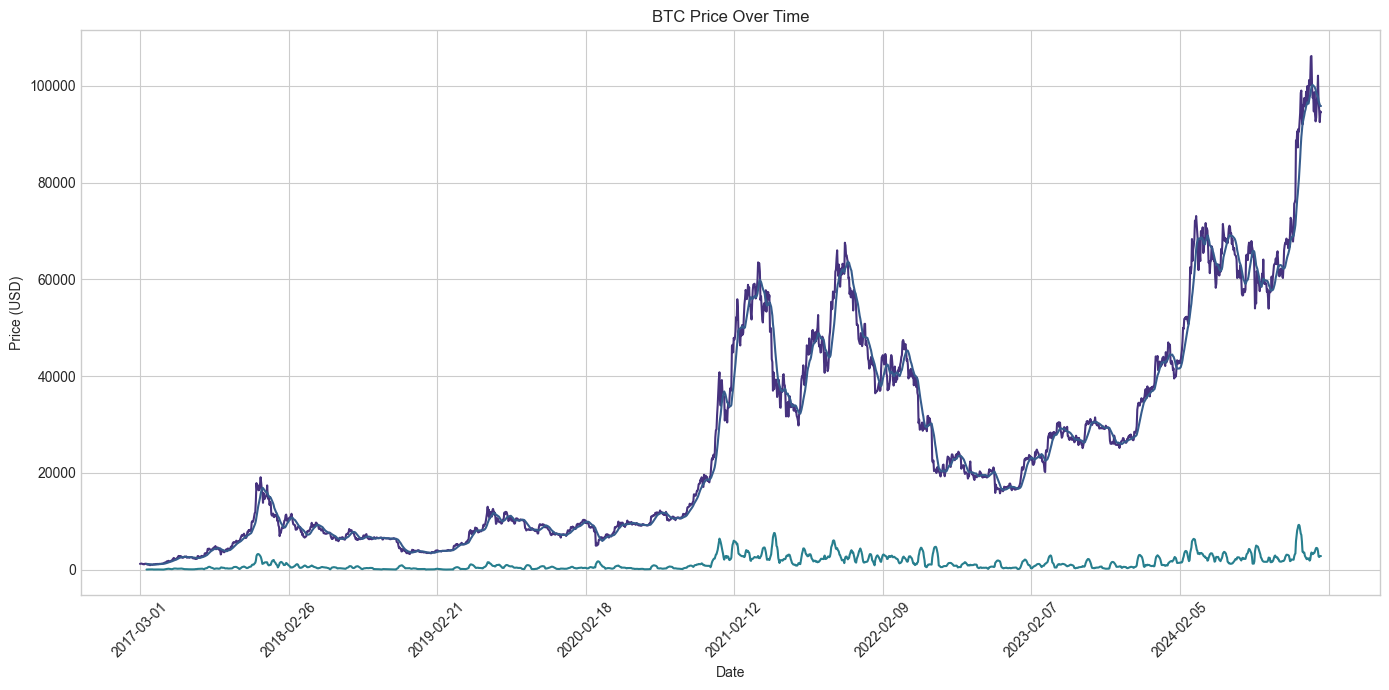

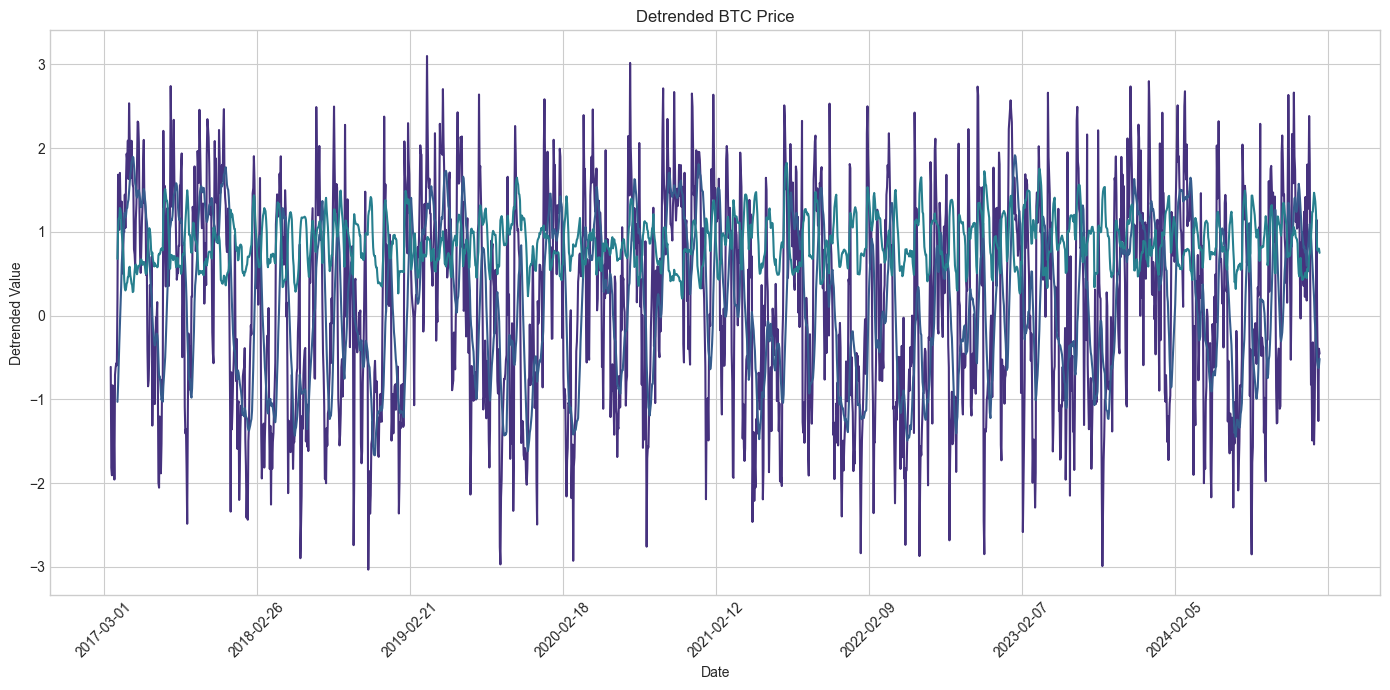

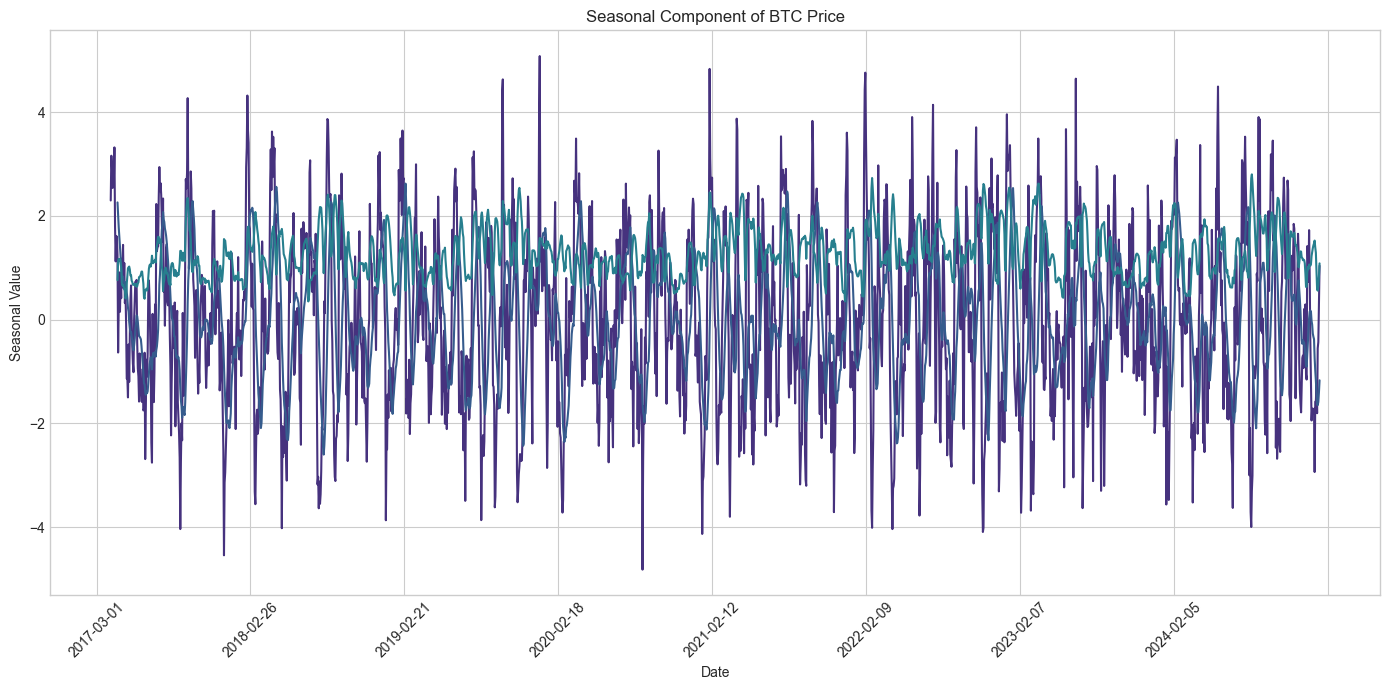

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_time_series(data, title, ylabel, window=12):
    """Helper function to create time series plots with consistent styling"""
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data, label='Data')
    plt.plot(data.index, data.rolling(window=window).mean(), label='Rolling Mean')
    plt.plot(data.index, data.rolling(window=window).std(), label='Rolling Std')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
    plt.tight_layout()
    plt.show()

# Calculate detrended and seasonal components
data_detrend = (df[target_variable] - df[target_variable].rolling(window=12).mean()) / df[target_variable].rolling(window=12).std()
data_season = data_detrend - data_detrend.shift(12)

# Plot original data
plot_time_series(df[target_variable], 'BTC Price Over Time', 'Price (USD)')

# Plot detrended data
plot_time_series(data_detrend, 'Detrended BTC Price', 'Detrended Value')

# Plot seasonal component
plot_time_series(data_season, 'Seasonal Component of BTC Price', 'Seasonal Value')

In [9]:
feature_groups = {
    "CBBI Features": cbbi_features,
    "Blockchain Features": blockchain_features,
    "Cross Market Features": cross_market_features,
    "Technical Indicator Features": technical_indicator_features,
    "Sentiment Features": sentiment_features
}

In [ ]:
def analyze_feature_group(df, features_in_group, group_name, target_col):
    """Performs and visualizes analysis for a specific group of features."""
    print(f"\n--- Analysis of {group_name} ---")

    if not all(feature in df.columns for feature in features_in_group):
        print(f"Warning: Not all features from {group_name} are present in the DataFrame. Skipping analysis for this group.")
        # Identify missing features
        missing_features = [f for f in features_in_group if f not in df.columns]
        print(f"Missing features: {missing_features}")
        return

    # 1. Descriptive Statistics for the group
    print(f"\nDescriptive Statistics for {group_name}:")
    print(df[features_in_group].describe().T)
    print("Interpretation: Review these statistics to understand the central tendency, spread, and range of each feature in this group.")

    # 2. Distribution Plots (Histograms) for each feature in the group
    print(f"\nDistribution Plots for {group_name}:")
    for feature in features_in_group:
        if feature in df.columns:
            plt.figure(figsize=(8, 5))
            sns.histplot(df[feature], kde=True)
            plt.title(f'Distribution of {feature} ({group_name})')
            plt.xlabel(feature)
            plt.ylabel('Frequency')
            plt.grid(True)
            plt.show()
            print(f"Interpretation: The histogram for {feature} shows its distribution shape. Look for skewness, peaks (modes), and potential outliers.")
        else:
            print(f"Warning: Feature '{feature}' not found, skipping its distribution plot.")

    # 3. Correlation Heatmap (within the group and with the target variable)
    print(f"\nCorrelation Analysis for {group_name}:")
    group_and_target_features = features_in_group + [target_col]
    # Ensure target_col is actually in df columns before attempting to use it
    if target_col not in df.columns:
        print(f"Warning: Target variable '{target_col}' not found. Cannot compute correlations with target.")
        correlation_df = df[features_in_group]
    else:
        # Filter out any features not in df.columns from group_and_target_features for correlation calculation
        valid_features_for_corr = [f for f in group_and_target_features if f in df.columns]
        correlation_df = df[valid_features_for_corr]

    if not correlation_df.empty:
        correlation_matrix = correlation_df.corr()
        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title(f'Correlation Heatmap: {group_name} and {target_col}')
        plt.show()
        print(f"Interpretation: The heatmap shows linear correlations. Values close to +1 or -1 indicate strong positive or negative linear relationships, respectively. Values close to 0 suggest weak linear relationships. Pay attention to correlations between features (multicollinearity) and between features and '{target_col}'.")
    else:
        print(f"Could not compute correlation matrix for {group_name} as no valid features were found or target variable is missing.")

    # 4. Scatter Plots against the Target Variable
    if target_col in df.columns:
        print(f"\nScatter Plots for {group_name} vs. {target_col}:")
        for feature in features_in_group:
            if feature in df.columns:
                plt.figure(figsize=(8, 5))
                sns.scatterplot(x=df[feature], y=df[target_col])
                plt.title(f'Scatter Plot: {feature} vs. {target_col}')
                plt.xlabel(feature)
                plt.ylabel(target_col)
                plt.grid(True)
                plt.show()
                print(f"Interpretation: This scatter plot visualizes the relationship between {feature} and {target_col}. Look for patterns such as linear, non-linear, or no clear relationship, and the presence of outliers.")
            else:
                print(f"Warning: Feature '{feature}' not found, skipping its scatter plot against target.")
    else:
        print(f"Target variable '{target_col}' not found. Skipping scatter plots against target.")
for group_name, features_list in feature_groups.items():
    if all(f in df.columns for f in features_list) and target_variable in df.columns:
            analyze_feature_group(df, features_list, group_name, target_variable)
    else:
        print(f"\nSkipping {group_name} due to missing features or target variable.")
        if target_variable not in df.columns:
            print(f"Target variable '{target_variable}' is missing.")
        missing_in_group = [f for f in features_list if f not in df.columns]
        if missing_in_group:
            print(f"Features missing from {group_name}: {missing_in_group}")

In [ ]:
from statsmodels.tsa.stattools import adfuller

print(" > Is the data stationary ?")
dftest = adfuller(df[target_variable], autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

print("\n > Is the de-trended data stationary ?")
dftest = adfuller(data_detrend.dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

print("\n > Is the 12-lag differenced de-trended data stationary ?")
dftest = adfuller(data_season.dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))


 > Is the data stationary ?
Test statistic = -0.327
P-value = 0.922
Critical values :
	1%: -3.433675467561267 - The data is not stationary with 99% confidence
	5%: -2.863008999826203 - The data is not stationary with 95% confidence
	10%: -2.5675520348463654 - The data is not stationary with 90% confidence

 > Is the de-trended data stationary ?
Test statistic = -14.406
P-value = 0.000
Critical values :
	1%: -3.4336636717018405 - The data is  stationary with 99% confidence
	5%: -2.8630037919874423 - The data is  stationary with 95% confidence
	10%: -2.567549261922421 - The data is  stationary with 90% confidence

 > Is the 12-lag differenced de-trended data stationary ?
Test statistic = -11.029
P-value = 0.000
Critical values :
	1%: -3.4337252441664483 - The data is  stationary with 99% confidence
	5%: -2.8630309758314314 - The data is  stationary with 95% confidence
	10%: -2.56756373605059 - The data is  stationary with 90% confidence


## Distribution Plot
- skewness
- kurtosis \
 -> need transform

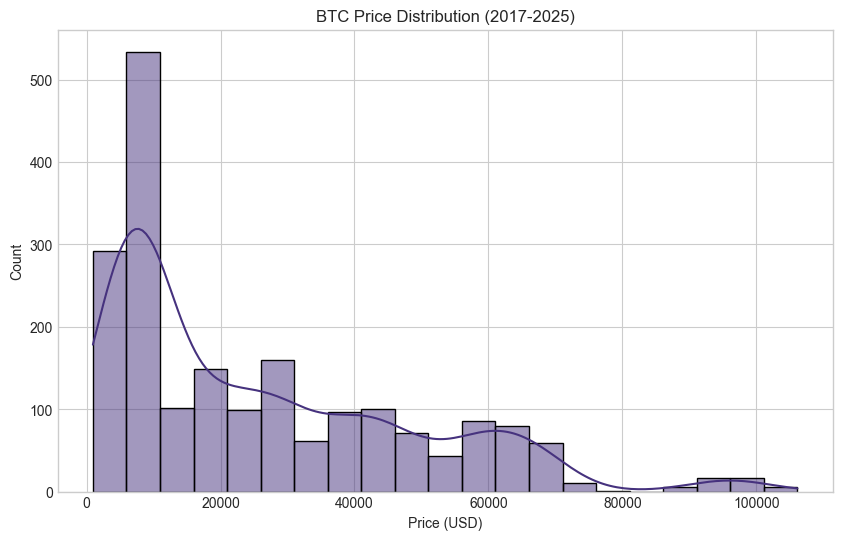

Skewness of BTC Price: 1.0610047155676767


In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df[target_variable], kde=True)
plt.title('BTC Price Distribution (2017-2025)')
plt.xlabel('Price (USD)')
plt.show()
print(f"Skewness of BTC Price: {df[target_variable].skew()}")

## Autocorrelation (ACF) and Partial Autocorrelation (PACF) Plots



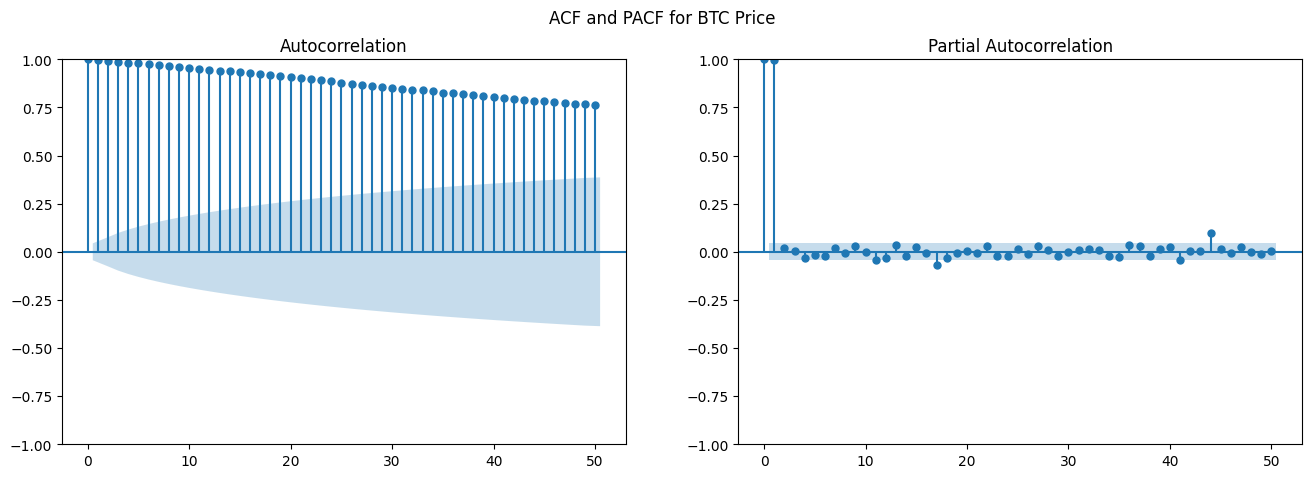

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
plot_acf(df[target_variable].dropna(), ax=axes[0], lags=50) # Adjust lags as needed
plot_pacf(df[target_variable].dropna(), ax=axes[1], lags=50) # Adjust lags as needed
plt.suptitle('ACF and PACF for BTC Price')
plt.show()

## Correlation Analysis

In [16]:
correlations_with_target = df[all_features + [target_variable]].corr()[target_variable].sort_values(ascending=False)
# print("--- Top 15 features correlated with BTC Price ---")
# print(correlations_with_target.head(15))
# print("\n--- Bottom 15 features correlated with BTC Price (most negative or least correlated) ---")
# print(correlations_with_target.tail(15)[::-1])
correlations_with_target.drop(target_variable)
# plt.figure(figsize=(10, 12)) # Adjust size based on number of features
# sns.barplot(x=correlations_with_target.drop(target_variable).values, y=correlations_with_target.drop(target_variable).index)
# plt.title('Feature Correlation with BTC Price')
# plt.xlabel('Correlation Coefficient')
# plt.show()

CSCSI20                                        0.937278
NYFANG                                         0.931123
IXIC                                           0.930728
GSPC                                           0.925176
DJI                                            0.907958
estimated_transaction_volume_usd_blockchain    0.870416
Gold_Price                                     0.844191
Gold_Share                                     0.841928
miner_revenue_blockchain                       0.824913
difficulty_blockchain                          0.812032
hash_rate_blockchain                           0.805417
2YMA_cbbi                                      0.614511
EM_ETF                                         0.594580
Woobull_cbbi                                   0.496491
RHODL_cbbi                                     0.486598
Oil_Crude_Price                                0.468250
Trolololo_cbbi                                 0.467881
Confidence_cbbi                                0

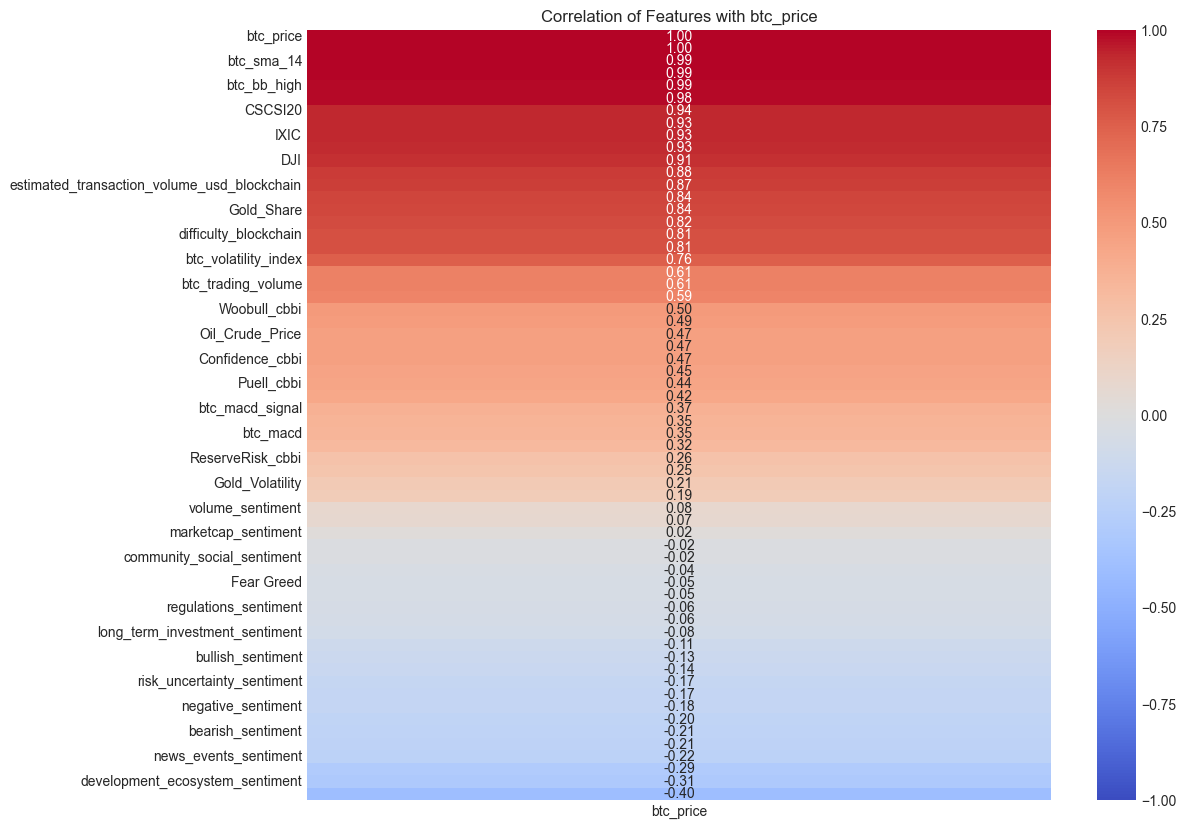

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[all_features + [target_variable]].corr()[[target_variable]].sort_values(by=target_variable, ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title(f'Correlation of Features with {target_variable}')
plt.show()

## Heatmap

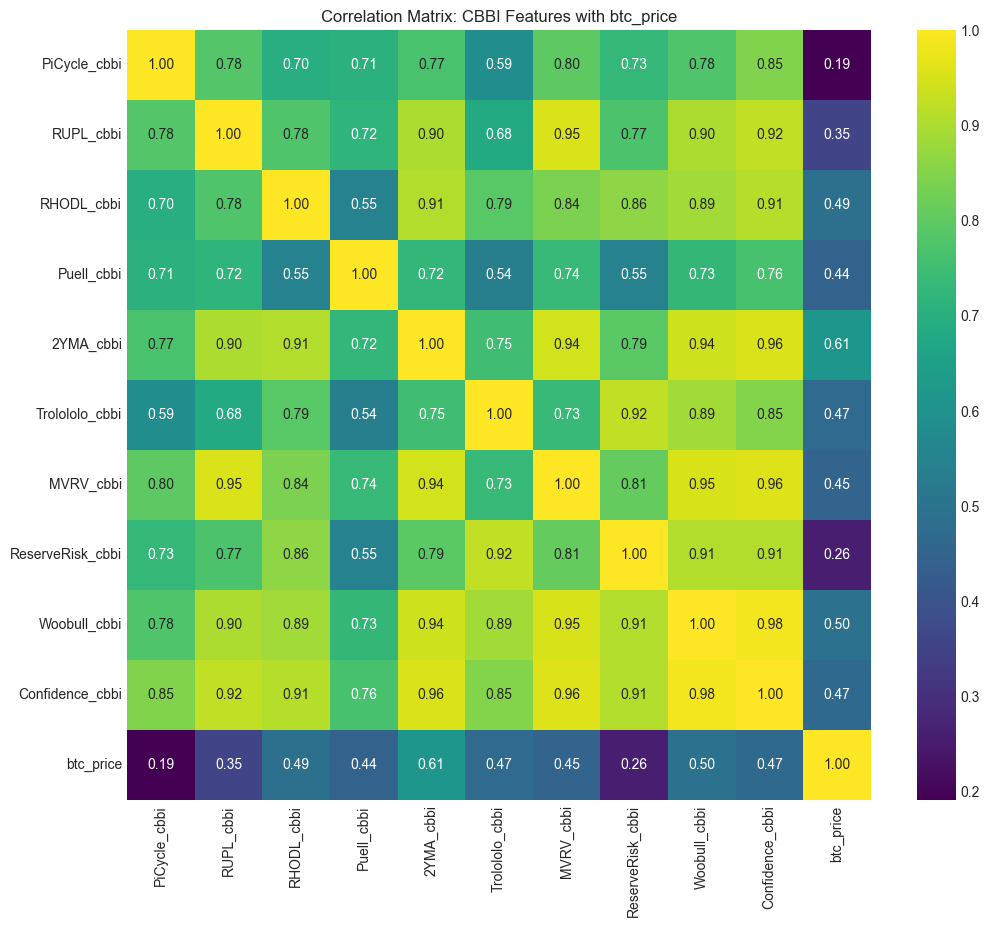

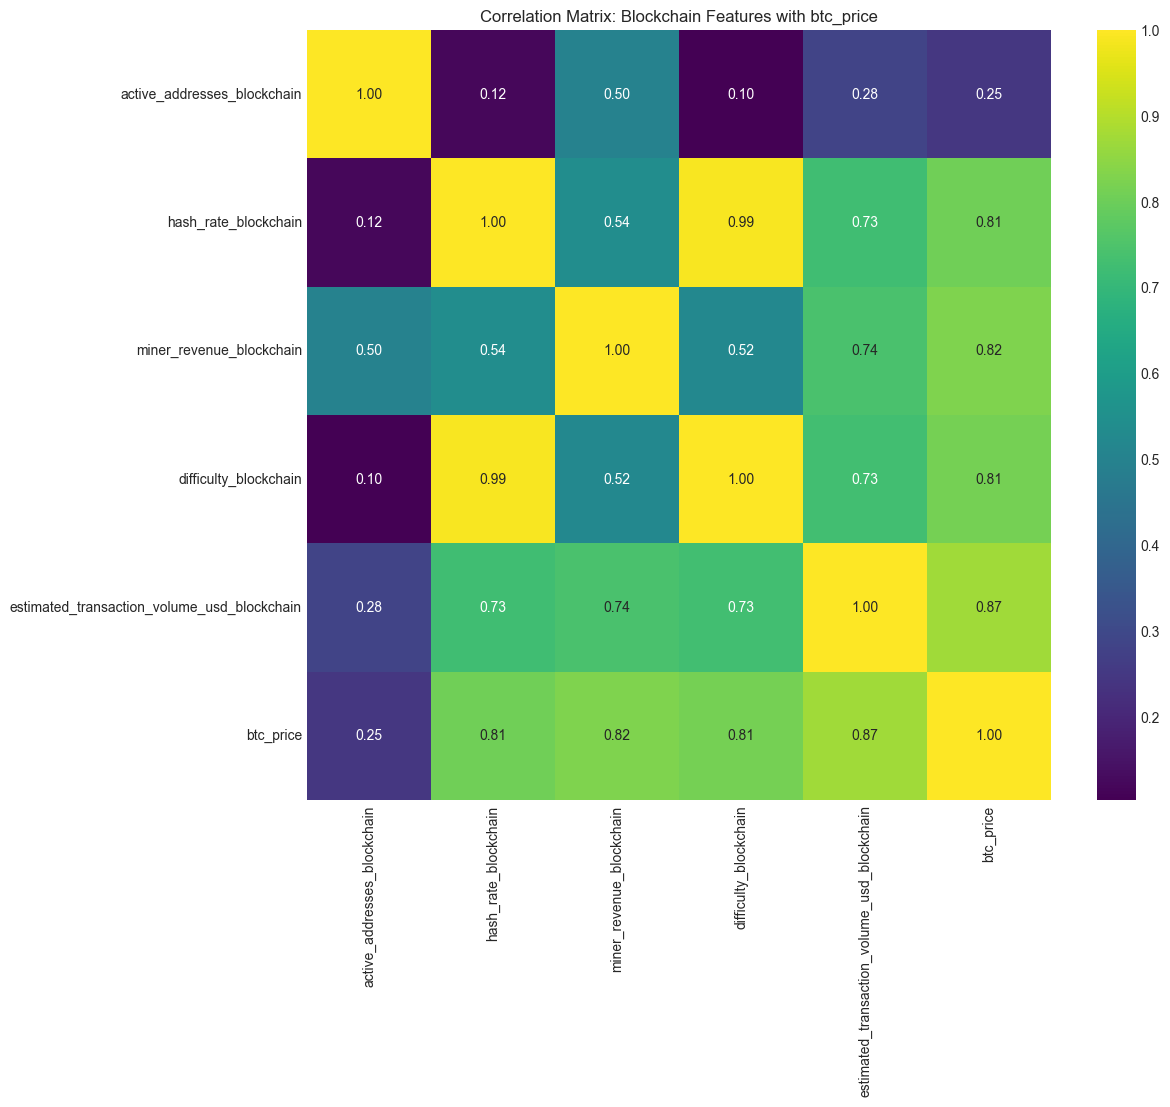

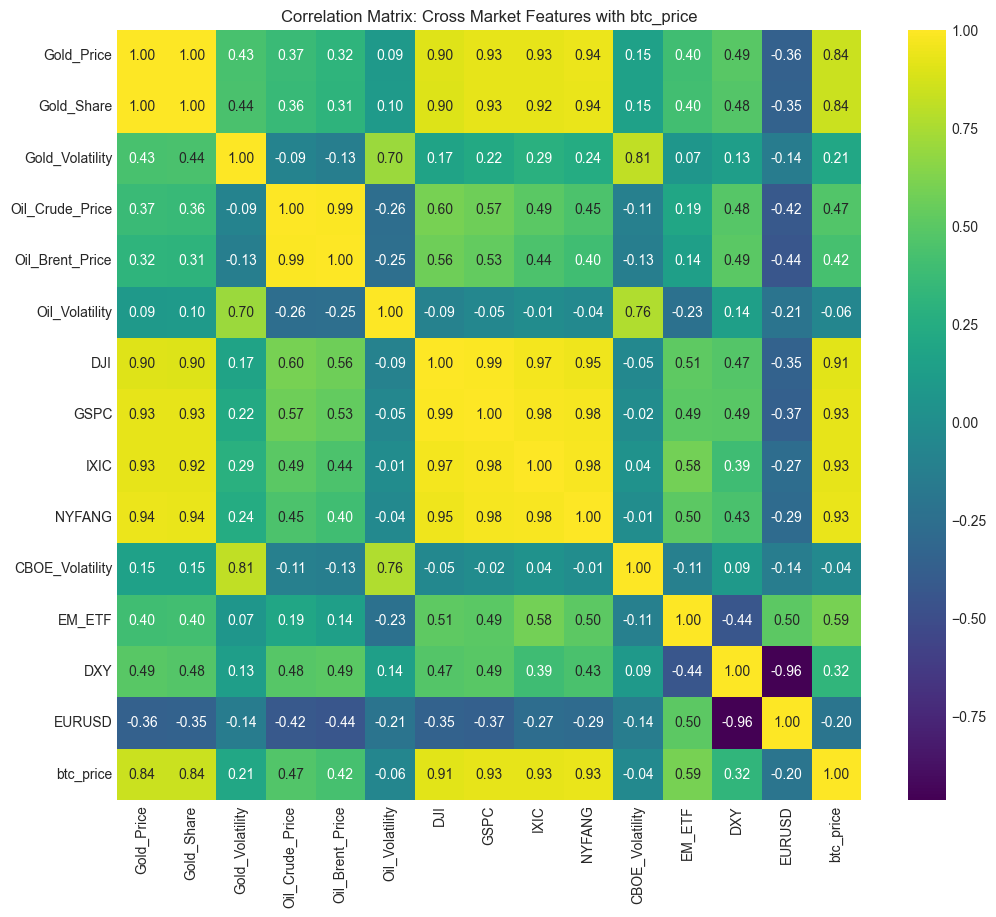

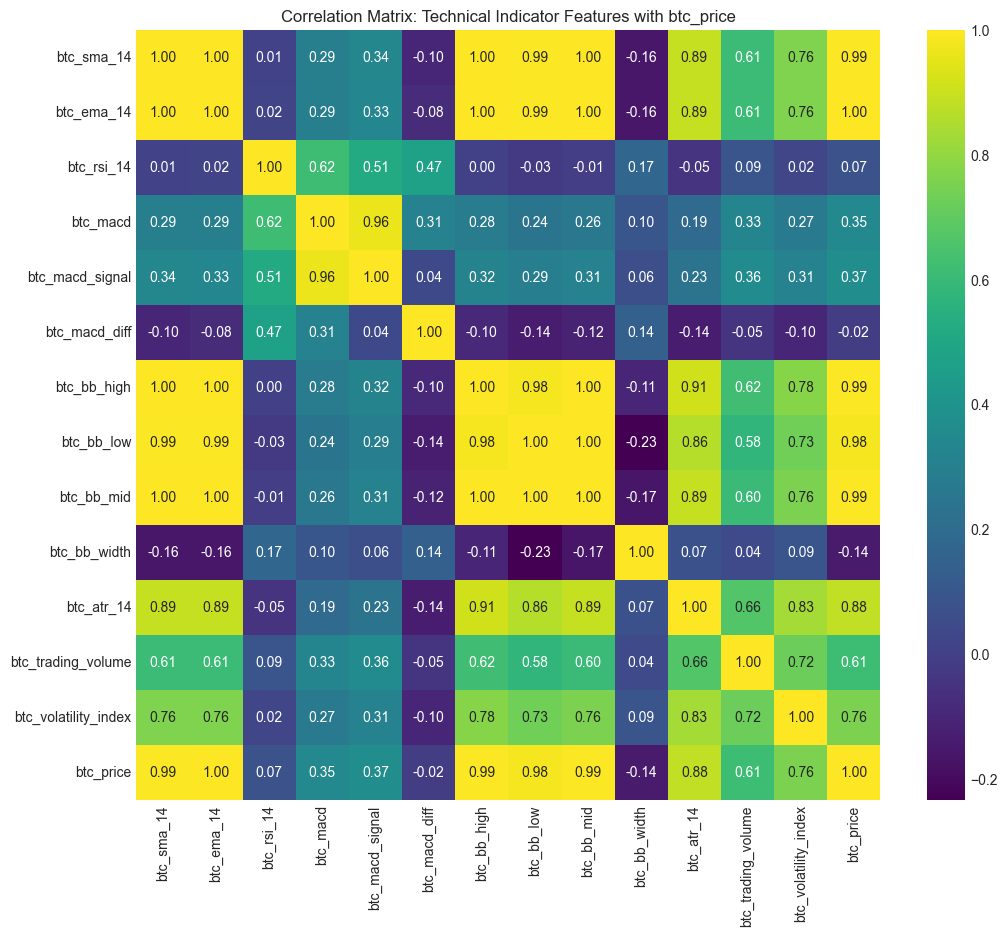

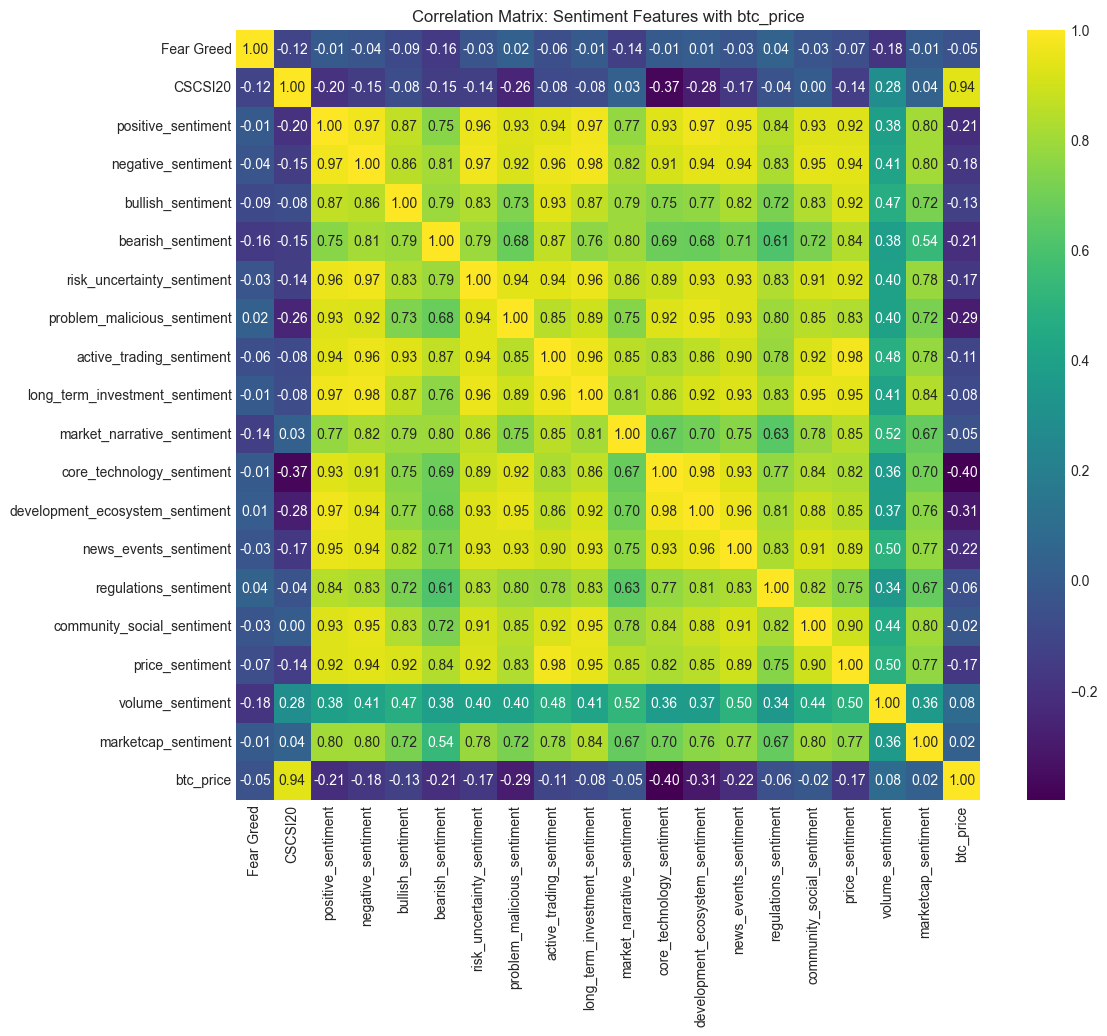

In [7]:
# Create correlation heatmaps for different feature groups with target

for group_name, features in feature_groups.items():
    if len(features) > 0:
        plt.figure(figsize=(12, 10))
        features_with_target = features + [target_variable]
        sns.heatmap(df[features_with_target].corr(), annot=True, cmap='viridis', fmt=".2f")
        plt.title(f'Correlation Matrix: {group_name} with {target_variable}')
        plt.show()

In [19]:
import matplotlib.dates as mdates

def plot_feature_vs_target(df, feature_name, target_name='btc_price'):
    """Plots a feature and the target on dual axes or normalized with year-only x-axis formatting."""
    if feature_name not in df.columns or target_name not in df.columns:
        print(f"Warning: {feature_name} or {target_name} not in DataFrame columns.")
        return
    
    # 🔒 Ensure index is datetime
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df = df.copy()
        df.index = pd.to_datetime(df.index)

    fig, ax1 = plt.subplots(figsize=(14, 7))
    
    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel(target_name, color=color)
    ax1.plot(df.index, df[target_name], color=color, label=target_name)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel(feature_name, color=color)
    ax2.plot(df.index, df[feature_name], color=color, label=feature_name, alpha=0.7)
    ax2.tick_params(axis='y', labelcolor=color)

    # Format x-axis ticks to show only the year
    ax1.xaxis.set_major_locator(mdates.YearLocator())  # set major ticks every year
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # format ticks to show only the year

    plt.xticks(rotation=45)
    plt.title(f'{target_name} vs. {feature_name}')
    fig.tight_layout()  # adjust layout to prevent clipping
    plt.show()

In [ ]:
# Plot features with correlation > 0.8
high_corr_features = correlations_with_target[correlations_with_target > 0.8].index.tolist()
low_corr_features = correlations_with_target[correlations_with_target < -0.2].index.tolist()
high_corr_features = [f for f in high_corr_features if f != target_variable]
low_corr_features = [f for f in low_corr_features if f != target_variable]
print("\n--- Analyzing Features with Correlation > 0.8 ---")
for feature in low_corr_features:
    plot_feature_vs_target(df, feature)

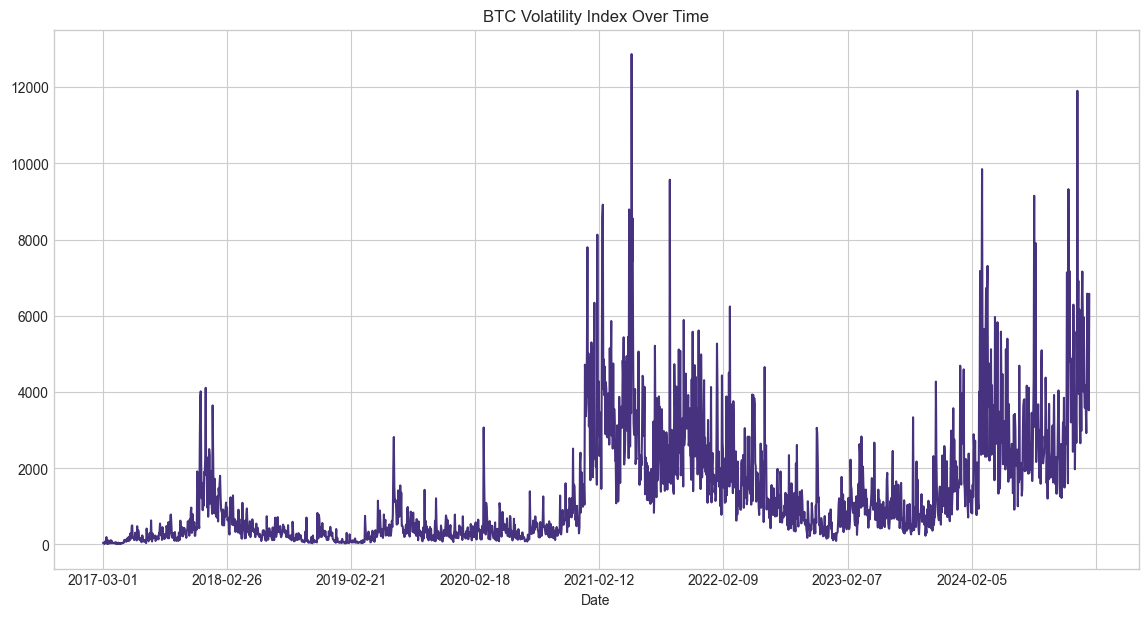


Correlation (BTC-GSPC) in High Volatility regime: 0.84
Correlation (BTC-GSPC) in Low Volatility regime: 0.93


In [31]:
if 'btc_volatility_index' in df.columns:
    plt.figure(figsize=(14, 7))
    df['btc_volatility_index'].plot(title='BTC Volatility Index Over Time')
    plt.show()

    # Example: Analyze correlation in high vs low volatility regimes
    # Define a threshold for high volatility (e.g., above 75th percentile)
    high_vol_threshold = df['btc_volatility_index'].quantile(0.75)
    df_high_vol = df[df['btc_volatility_index'] > high_vol_threshold]
    df_low_vol = df[df['btc_volatility_index'] <= high_vol_threshold]

    if not df_high_vol.empty and not df_low_vol.empty:
       corr_high_vol = df_high_vol[['btc_price', 'GSPC']].corr().iloc[0,1] # Example with GSPC
       corr_low_vol = df_low_vol[['btc_price', 'GSPC']].corr().iloc[0,1]
       print(f"\nCorrelation (BTC-GSPC) in High Volatility regime: {corr_high_vol:.2f}")
       print(f"Correlation (BTC-GSPC) in Low Volatility regime: {corr_low_vol:.2f}")

## Scatter Plots of Key Features vs. Target


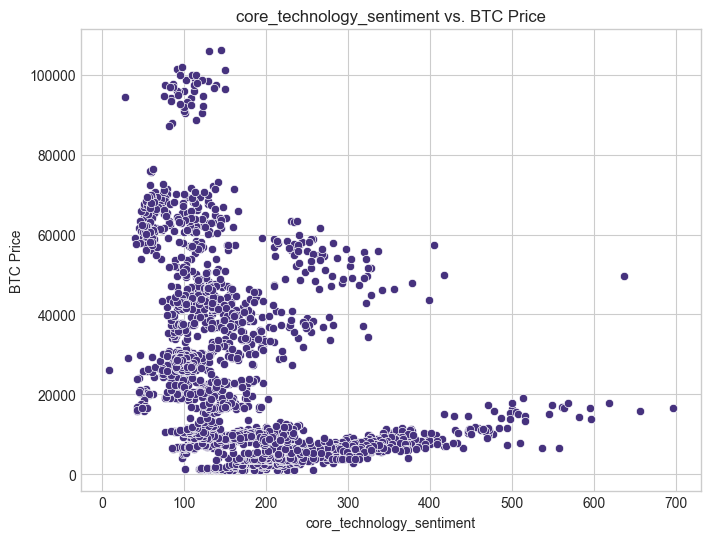

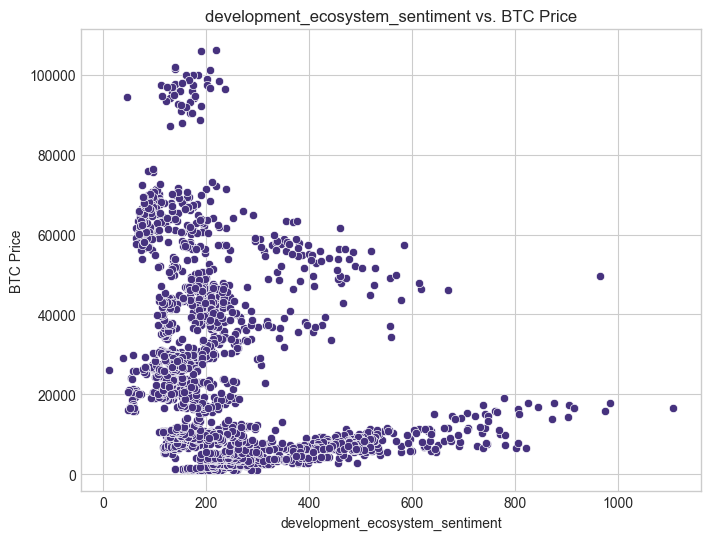

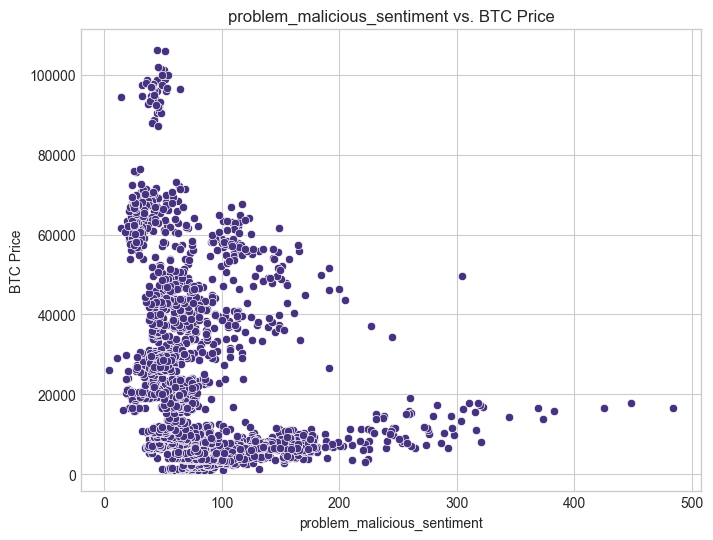

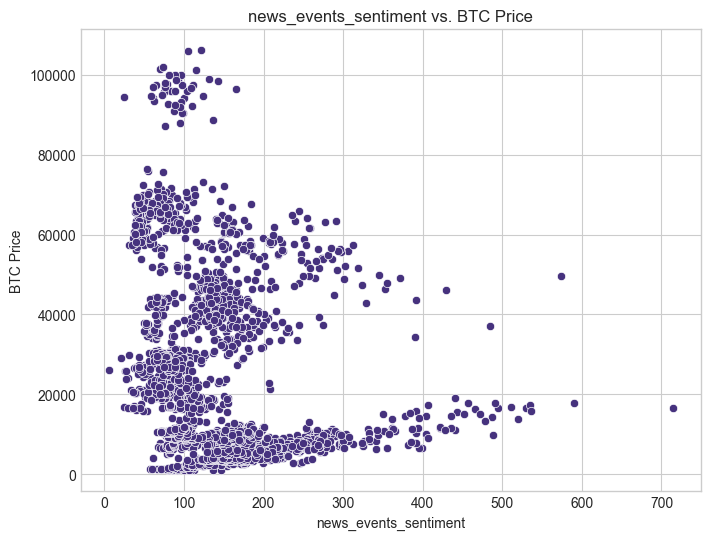

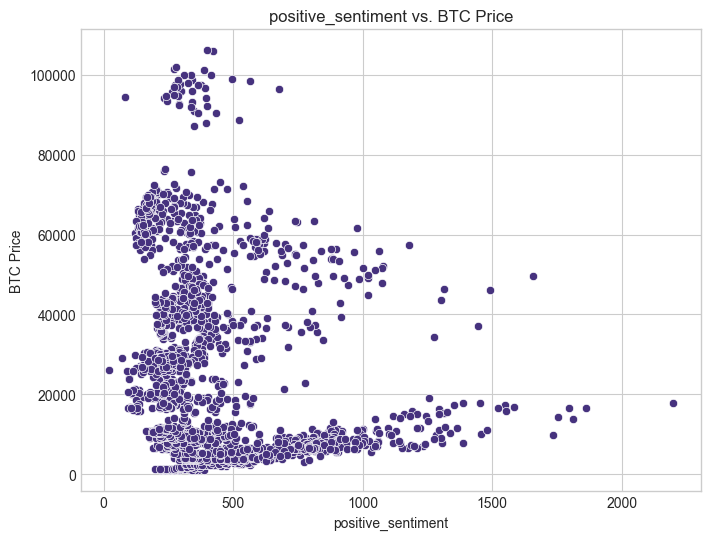

In [24]:
top_features = correlations_with_target.head(5).index.tolist()
bottom_features = correlations_with_target.tail(5)[::-1].index.tolist()
top_features = [f for f in top_features if f != target_variable]
bottom_features = [f for f in bottom_features if f != target_variable]


for feature in bottom_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df[target_variable])
    # For time-series context, you can color points by time:
    # sns.scatterplot(x=df[feature], y=df[target_variable], hue=df.index, legend=None)
    plt.title(f'{feature} vs. BTC Price')
    plt.xlabel(feature)
    plt.ylabel('BTC Price')
    plt.show()